In [14]:
import random

def kArmedBandit(k=10, e=0.1, steps=1000, q_star=[0]):
    # if len(q_star) == 1 and k>1:
    #     q_star = q_star*k

    Q = {a:0 for a in range(k)}
    N = {a:0 for a in range(k)}

    rewards = []
    actions = []
    for i in range(steps):
        A = random.choice(range(k)) if random.random() < e else max(Q, key=lambda k: Q[k])
        R = random.gauss(q_star[A], 1)
        N[A] = N[A] + 1

        alpha = (1/N[A])
        Q[A] = Q[A] + alpha * (R-Q[A]) 

        rewards.append(R)
        actions.append(A)

    return actions, rewards, Q

In [15]:
_,_,q = kArmedBandit(10, 0.5, 1000, [random.gauss(0, 1) for i in range(10)])
q

{0: 0.2912707089536698,
 1: 0.8756305758032765,
 2: 0.9217474296184451,
 3: -0.8740264122102235,
 4: -0.42438012007145376,
 5: -0.23491141812576735,
 6: -1.2777514890497534,
 7: 1.4502244109464948,
 8: 0.5387960266874389,
 9: 1.059818956045741}

In [16]:
import pandas as pd

runs = 2000
df = None

q_star = [random.gauss(0, 1) for i in range(10)]
for i in range(runs):
    actions, rewards, q = kArmedBandit(q_star = q_star)
    temp = pd.DataFrame({"steps": range(len(actions)), "actions": actions, "rewards": rewards})
    temp.insert(0, 'run', i) 
    if df is None:
        df = temp
    else: 
        df = pd.concat([df,temp])


df.head()

,run,steps,actions,rewards
0,0,0,0,-1.001101
1,0,1,1,0.972024
2,0,2,1,-1.641010
3,0,3,2,1.757350
4,0,4,2,0.060797


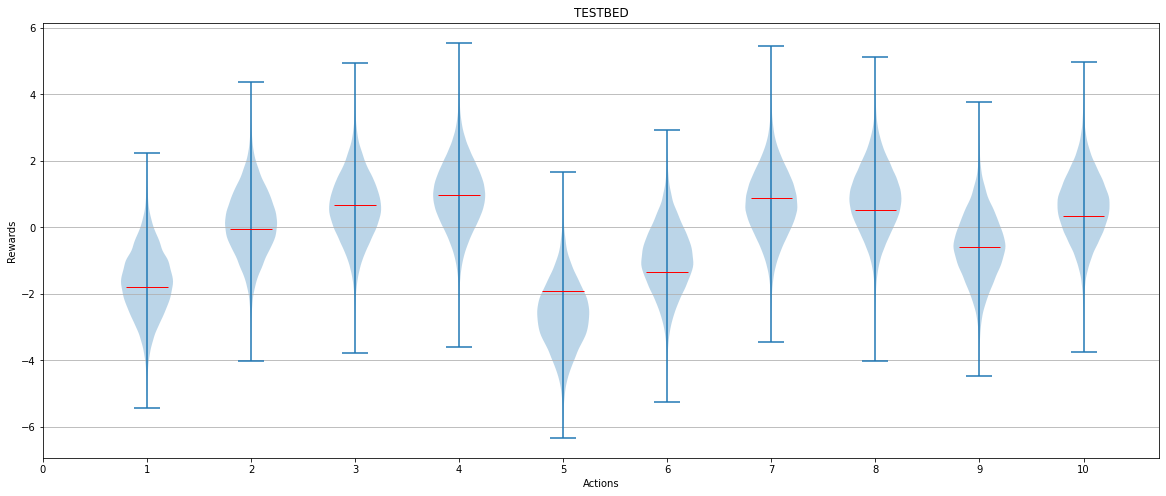

In [17]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(20, 8))

axes.violinplot(dataset = [df[df.actions == 0]["rewards"].values,
                           df[df.actions == 1]["rewards"].values,
                           df[df.actions == 2]["rewards"].values,
                           df[df.actions == 3]["rewards"].values,
                           df[df.actions == 4]["rewards"].values,
                           df[df.actions == 5]["rewards"].values,
                           df[df.actions == 6]["rewards"].values,
                           df[df.actions == 7]["rewards"].values,
                           df[df.actions == 8]["rewards"].values,
                           df[df.actions == 9]["rewards"].values])

for k, v in q.items():
    axes.hlines(y=v, xmin=k+1-0.2, xmax=k+1+0.2, linewidth=1, color='r')

axes.set_title('TESTBED')
axes.yaxis.grid(True)
axes.set_xlabel('Actions')
axes.set_ylabel('Rewards')
axes.set_xticks(ticks=range(11))

In [48]:
opt = pd.DataFrame({"n":range(1000)})
opt['rw'] = opt.n.apply(lambda k: sum([random.gauss(max(q_star), 1) for i in range(k+1)]) / (k+1))
opt

,n,rw
0,0,-0.005379
1,1,-0.519637
2,2,-0.298228
3,3,1.213965
4,4,0.652842
...,...,...
995,995,0.994840
996,996,0.901455
997,997,0.979818
998,998,1.023917


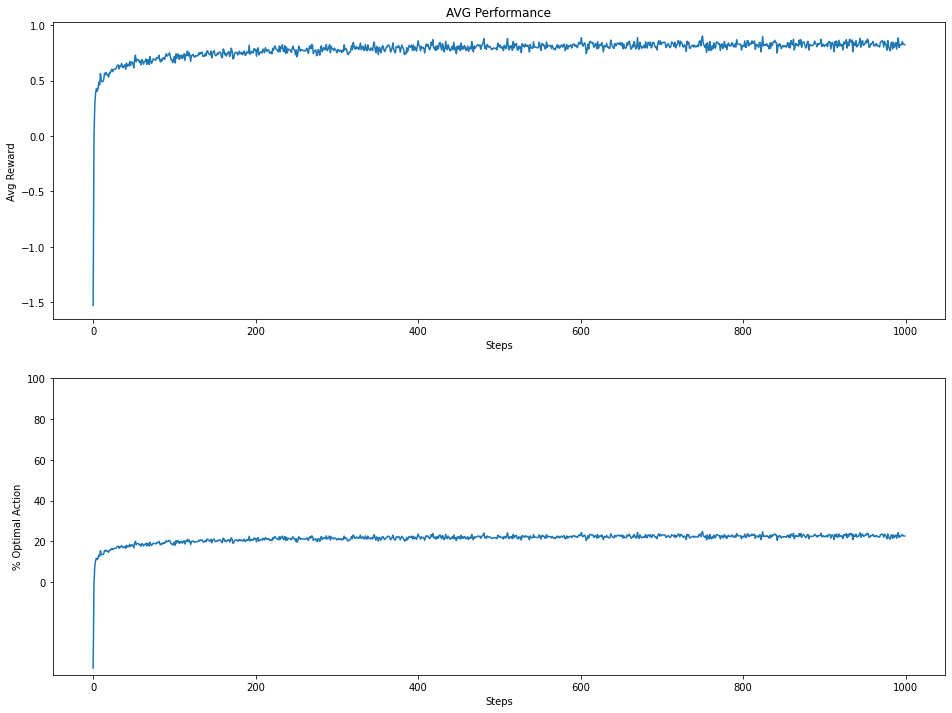

In [57]:
fig, axes = plt.subplots(2,1, figsize=(16, 12))

axes[0].plot(df[["steps", "rewards"]].groupby(['steps']).mean())

# actions_range = (q[max(q, key=lambda k: q[k])] - q[min(q, key=lambda k: q[k])])
actions_range = (max(q_star)-min(q_star))
axes[1].plot((df[["steps", "rewards"]].groupby(['steps']).mean()/actions_range)*100)

axes[0].set_title('AVG Performance')
axes[0].set_xlabel('Steps')
axes[0].set_ylabel('Avg Reward')

axes[1].set_xlabel('Steps')
axes[1].set_ylabel('% Optimal Action')
axes[1].set_yticks(ticks=range(0, 101, 20))